In [1]:
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%cd "C:\Users\siddh\Downloads\Parquet"
filename0 = "QCDToGGQQ_IMGjet_RH1all_jet0_run0_n36272.test.snappy (2).parquet"

C:\Users\siddh\Downloads\Parquet


In [3]:
from pyarrow.parquet import ParquetFile
import pyarrow as pa 

pf0 = ParquetFile(filename0) 
first_ten_rows = next(pf0.iter_batches(batch_size = 1000)) 
df = pa.Table.from_batches([first_ten_rows]).to_pandas() 

In [4]:
df

,X_jets,pt,m0,y
0,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",112.411095,21.098248,0.0
1,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",95.220406,14.030600,1.0
2,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",97.007317,17.728968,1.0
3,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",82.490311,14.702741,0.0
4,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.328483...",102.539238,19.456257,0.0
...,...,...,...,...
995,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",91.645355,22.737965,0.0
996,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",87.665298,24.773489,0.0
997,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",104.653259,20.579176,0.0
998,"[[[0.8996577858924866, 0.0, 0.0, 0.0, 0.0, 0.0...",176.875732,29.446840,0.0


In [5]:
type(df['X_jets'])

pandas.core.series.Series

In [6]:
def func(x):
    return tf.constant(x.tolist())

In [7]:
train_data = np.moveaxis(np.array([func(x) for x in df["X_jets"]]),1,-1)

In [8]:
train_data.shape

(1000, 125, 125, 3)

In [9]:
train_labels = np.array(df["y"].tolist())

In [10]:
train_labels = train_labels.reshape(-1,1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


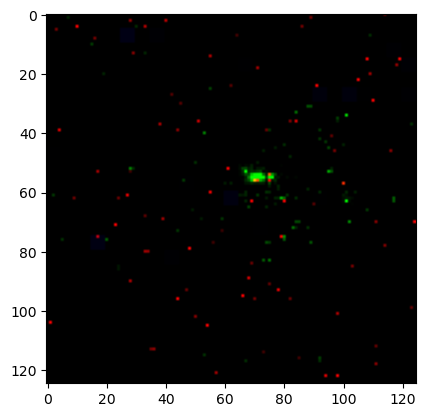

In [11]:
plt.imshow(train_data[10]);

In [12]:
datagen = ImageDataGenerator()

In [13]:
# Splitted into train and validation dataset (validation data is used then for testing)
from sklearn.model_selection import train_test_split
train_matrix, test_matrix, train_labels, test_labels = train_test_split(train_data, 
                                                                        train_labels,
                                                                        test_size = 0.2,     # use 10 percent data
                                                                        random_state = 42) 

In [14]:
len(train_matrix), len(test_matrix), len(train_labels), len(test_labels), train_matrix.shape

(800, 200, 800, 200, (800, 125, 125, 3))

# Model0

In [15]:
model = tf.keras.Sequential([
  Conv2D(10, 10, padding='same', activation='relu'),
  MaxPool2D(),
  Conv2D(20, 10, padding='same', activation='relu'),
  MaxPool2D(),
  Conv2D(40, 10, padding='same', activation='relu'),
  MaxPool2D(),
  Flatten(),
  tf.keras.layers.Dropout(0.3),
  Dense(50, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  Dense(25, activation='relu'),
  Dense(1, activation = "sigmoid")
])


optimizer = tf.keras.optimizers.Adam(lr = 0.0003)
    
# Compile the model
model.compile(loss="binary_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

history = model.fit(datagen.flow(train_matrix,train_labels, batch_size=64,shuffle = False), 
                    epochs=30, 
                    verbose = 1,
                   validation_data=datagen.flow(test_matrix, test_labels, batch_size=32,shuffle=False))

C:\Users\siddh\anaconda3\envs\tf_gpu\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/30
13/13 [==============================] - 6s 105ms/step - loss: 0.6720 - accuracy: 0.5938 - val_loss: 0.6718 - val_accuracy: 0.6500
Epoch 2/30
13/13 [==============================] - 1s 56ms/step - loss: 0.6311 - accuracy: 0.6637 - val_loss: 0.6760 - val_accuracy: 0.6300
Epoch 3/30
13/13 [==============================] - 1s 57ms/step - loss: 0.6201 - accuracy: 0.6625 - val_loss: 0.6595 - val_accuracy: 0.6600
Epoch 4/30
13/13 [==============================] - 1s 57ms/step - loss: 0.6070 - accuracy: 0.6712 - val_loss: 0.6680 - val_accuracy: 0.6800
Epoch 5/30
13/13 [==============================] - 1s 57ms/step - loss: 0.6154 - accuracy: 0.6900 - val_loss: 0.6578 - val_accuracy: 0.6650
Epoch 6/30
13/13 [==============================] - 1s 55ms/step - loss: 0.5788 - accuracy: 0.7038 - val_loss: 0.6776 - val_accuracy: 0.6950
Epoch 7/30
13/13 [==============================] - 1s 55ms/step - loss: 0.5838 - accuracy: 0.6875 - val_loss: 0.6679 - val_accuracy: 0.6600
Epoch 8/30
1

In [22]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def calculate_results(y_true, y_pred):
    """
    Calculate model's accuracy, precision, recall and f1 score of a binary classification model.
    """
    # Calculate accuracy
    model_accuracy = accuracy_score(y_true, y_pred)*100
    # Calculate model precision, recall and f1-score using "weightd average"
    model_precision, model_recall, model_f1, __ = precision_recall_fscore_support(y_true, y_pred, average = "weighted")    # weighted average is good in the case when there is label imbalance
    model_results = {"accuracy": model_accuracy,
                     "precision": model_precision,
                     "recall": model_recall,
                     "f1": model_f1}
    return model_results

In [23]:
preds0 = model.predict(datagen.flow(train_matrix, train_labels, batch_size=64, shuffle=False))
preds0 = np.array(tf.round(preds0), dtype = 'int').reshape(-1,)
results0 = calculate_results(y_true=train_labels,y_pred=preds0)
results0

13/13 [==============================] - 1s 42ms/step


{'accuracy': 97.75,
 'precision': 0.9780583410300392,
 'recall': 0.9775,
 'f1': 0.9774782780410743}

In [24]:
from sklearn.metrics import roc_auc_score
res0 = roc_auc_score(train_labels,preds0)
res0

0.9768111406665623

In [29]:
model.save('CommonTask2_tf')

INFO:tensorflow:Assets written to: CommonTask2_tf\assets


INFO:tensorflow:Assets written to: CommonTask2_tf\assets
